In [6]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data_before_split = load_breast_cancer()

In [221]:
data_before_split.data[0, :]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [211]:
#print(data_before_split.data[0, :])
#x is the sample
yes = np.array_split(data_before_split.data, data_before_split.data.shape[0])
print((data_before_split.data - yes).shape)
print(data_before_split)

(569, 569, 30)
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0

In [445]:
def data_splitter(data, trainamt):
    """Returns training and test data sets based on the percentage of training set inputted."""
    copy_of = data
    num_sample = int((data.data.shape)[0] * trainamt)
    indices = np.arange(data.data.shape[0])
    np.random.shuffle(indices)
    indices = indices[:num_sample]
    is_test = np.ones(data.data.shape[0]).astype(bool)
    is_test[indices] = False
    xtrain = data.data[~is_test]
    ytrain = data.target[~indices]
    xtest = data.data[is_test]
    ytest = data.target[is_test]
    return xtrain, ytrain, xtest, ytest
split_data = data_splitter(data_before_split, 0.95)

In [145]:

data = load_breast_cancer()
indices = np.random.randint(data.data.shape[0], size=500)
data.data[indices]
is_training = np.zeros([569, ]) != 0
is_training[indices] = True
test = data.data[is_training]

In [412]:
class Knn:
    """Knn """
    def __init__(self, k, threshold=0.5):
        self.value = k
        self.threshold = threshold
    
    def fit(self, xtrain, ytrain):
        self.data = xtrain
        self.target = ytrain
    
    def predict(self, xtest):
        proba = self.predict_proba(xtest)
        return (proba[:,1] > self.threshold).astype(np.float32)

    def predict_proba(self, xtest):
        
        return_list = []
        for x in xtest:
            distances = (((self.data - x) ** 2).sum(axis=1))
            indices = np.argsort(distances)[:self.value]
            probability = self.target[indices].mean()
            return_list.append(probability)
        
        return_array = np.array(return_list)
        return np.stack([1- return_array, return_array], axis=1)
            
first_try = Knn(10)
first_try.fit(data_before_split.data[290:], data_before_split.target[290:])
print(first_try.predict_proba(data_before_split.data[290:]))
#print(data_before_split.target[290:])
#use argsort to speed up

[[0.1 0.9]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]
 [0.8 0.2]
 [0.7 0.3]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.7 0.3]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]

In [160]:
def accuracy_check(prediction, ytest):
    final = prediction == ytest
    return final.astype(int).sum() / final.shape[0]
        

first_try = Knn(1)
first_try.fit(data_before_split.data[290:], data_before_split.target[290:])
pred = first_try.predict(data_before_split.data[290:])    
accuracy_check(pred, data_before_split.target[290:])

1.0

In [326]:
import matplotlib.pyplot as plt
atrain, btrain, atest, btest = data_splitter(data_before_split, 0.5)
y = 10
ctrain, dtrain, ctest, dtest = data_before_split.data[:y], data_before_split.target[y:], data_before_split.data[:y], data_before_split.target[y:]
number_of_k_in_graph = 50
input_array_list = []
y_array_list = []
for nums in range(1, number_of_k_in_graph + 1):
    first_k = Knn(nums)
    first_k.fit(ctrain, dtrain)
    predtest = first_k.predict(ctest)
    input_array_list.append(accuracy_check(predtest, dtest))
    y_array_list.append(nums)
input_array = np.array(input_array_list)
y_array = np.array(y_array_list)
f = plt.figure()
plt.scatter(y_array, input_array, color='red')
plt.xlabel('K value')
plt.ylabel('Accuracy of Prediction')
plt.title('Plot of K-value Relationship with Accuracy')

/var/folders/hs/9wxtjrjx2k718tlbtzyfl1dm0000gn/T/ipykernel_12961/3988325639.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  final = prediction == ytest


AttributeError: 'bool' object has no attribute 'astype'

Text(0.5, 1.0, 'Plot of Kn & Accuracy')

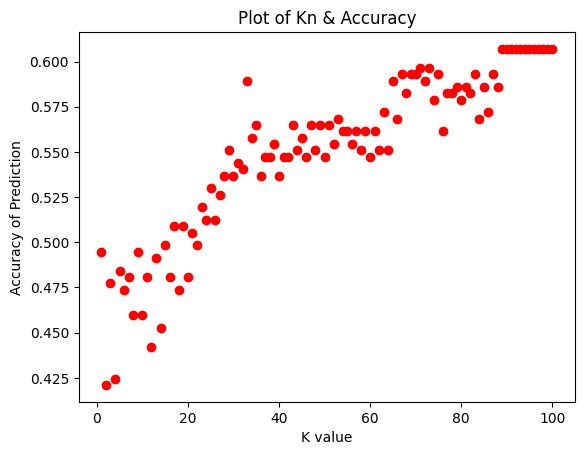

In [331]:
from sklearn.neighbors import KNeighborsClassifier
atrain, btrain, atest, btest = data_splitter(data_before_split, 0.5)
number_of_k_in_graph = 100
input_array_list = []
y_array_list = []
for nums in range(1, number_of_k_in_graph + 1):
    neigh = KNeighborsClassifier(n_neighbors=nums)
    neigh.fit(atrain, btrain)
    pred = neigh.predict(atest) 
    input_array_list.append(accuracy_check(pred, btest))
    y_array_list.append(nums)
input_array = np.array(input_array_list)
y_array = np.array(y_array_list)
f = plt.figure()
plt.scatter(y_array, input_array, color='red')
plt.xlabel('K value')
plt.ylabel('Accuracy of Prediction')
plt.title('Plot of Kn & Accuracy')

In [356]:
neb = KNeighborsClassifier(n_neighbors=1)
c = 537
neb.fit(data_before_split.data[:c], data_before_split.target[:c])
print(neb.predict_proba(data_before_split.data[c:]))
a = neb.predict(data_before_split.data[c:])
print(accuracy_check(a,data_before_split.target[c:] ))
print(a)
print(data_before_split.target[c:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
1.0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]


In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.8)

my_k = Knn(10)
my_k.fit(X_train, y_train)

other_k = KNeighborsClassifier(n_neighbors=10)
other_k.fit(X_train, y_train)

#print(my_k.predict_proba(X_test) == other_k.predict_proba(X_test))
my_pred = my_k.predict(X_test)
sk_pred = other_k.predict(X_test)
prediction_comparison = np.isclose(my_pred, sk_pred)
print(prediction_comparison.all())




# def metrics(probability, threshold, label):



True


In [507]:
((pred==True) & (ytest==True)).sum()

76

In [503]:
ytest

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0])

In [533]:
def tp(pred, ytest):
    #the predicted as 1 and being actual 1 
    return ((pred==True) & (ytest==True)).sum()

def fp(pred, ytest):
    #the false predictions that are 1
    return ((pred==True) & (ytest==False)).sum()

def tn(pred, ytest):
    #the correct predictions that are 0
    return ((pred==False) & (ytest==False)).sum()

def fn(pred, ytest):
    #the false predictions that are 0
    return ((pred==False) & (ytest==True)).sum()

def tpr(pred, label):
    return tp(pred, label) / (tp(pred, label) + fn(pred, label))

def fnr(pred, label):
    return fn(pred, label) / (fn(pred, label) + tp(pred, label))

def fpr(pred, label):
    return fp(pred, label) / (fp(pred, label) + tn(pred, label))

def accuracy(pred, ytest):
    return (tp(pred, ytest) + tn(pred, ytest)) / ytest.shape[0]

synthetic_pred = np.array([0, 1, 0, 1])
synthetic_test = np.array([1, 1, 0, 0])



In [537]:
import numpy as np # most used math library
from sklearn.datasets import load_breast_cancer # sklearn is the most popular python library for data science.
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
xtrain, xtest, ytrain, ytest = train_test_split(data.data, data.target, train_size=0.8)
sk_ = Knn(10)
sk_.fit(xtrain, ytrain)
sk_pred = sk_.predict_proba(xtest)[:,1]

idx = np.argsort(sk_pred)
thresholds =  np.concatenate([[-1],(sk_pred[idx][1:] + sk_pred[idx][:-1]) / 2, [10] ])
accuracies = []
tpr_list = []
fpr_list = []
for t in thresholds:
    pred = (sk_pred >= t).astype(np.float32)
    accuracies.append(accuracy(pred, ytest))
    tpr_list.append(tpr(pred, ytest))
    fpr_list.append(fpr(pred, ytest))

Text(0, 0.5, 'True Positive Rate')

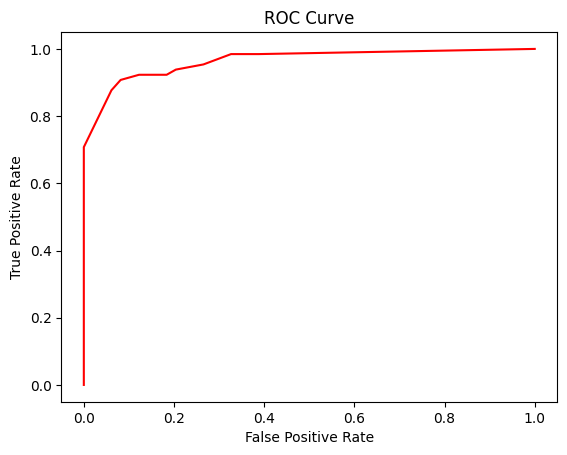

In [539]:
f = plt.figure
plt.plot(fpr_list, tpr_list, color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [536]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(data.data, data.target, train_size=0.8)
# sk_ = Knn(10)
# sk_.fit(xtrain1, ytrain1)
# sk_pred = sk_.predict_proba(xtest1)
# score = roc_auc_score(ytest1, sk_pred[:, 1])
f = plt.figure
number_of_k = 20
input_array_list = []
y_array_list = []
for nums in range(1, number_of_k_in_graph + 1):
    first_k = Knn(nums)
    first_k.fit(xtrain1, ytrain1)
    predtest = first_k.predict(xtest1)
    input_array_list.append(nums)
    y_array_list.append(roc_auc_score(ytest1, sk_pred[:, 1]))
kvalues = np.array(input_array_list)
scores = np.array(y_array_list)
plt.plot(kvalues, scores, color='red')
plt.xlabel('K Value')
plt.ylabel('ROC AUC Score')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
class Knn:
    """Knn """
    def __init__(self, k, threshold=0.5):
        self.value = k
        self.threshold = threshold
    
    def fit(self, xtrain, ytrain):
        self.data = xtrain
        self.target = ytrain
    
    def predict(self, xtest):
        proba = self.predict_proba(xtest)
        return (proba[:,1] > self.threshold).astype(np.float32)

    def predict_proba(self, xtest):
        
        return_list = []
        for x in xtest:
            distances = (((self.data - x) ** 2).sum(axis=1))
            indices = np.argsort(distances)[:self.value]
            probability = self.target[indices].mean()
            return_list.append(probability)
        
        return_array = np.array(return_list)
        return np.stack([1- return_array, return_array], axis=1)
            
first_try = Knn(10)
first_try.fit(data_before_split.data[290:], data_before_split.target[290:])
print(first_try.predict_proba(data_before_split.data[290:]))
#print(data_before_split.target[290:])
#use argsort to speed up

[[0.1 0.9]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]
 [0.8 0.2]
 [0.7 0.3]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.7 0.3]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.  1. ]

In [ ]:
def cross_validation(data, trainamt, validamt, testamt):
    xtrain_valid, ytrain_valid, testamt, testtarget = data_splitter(data, trainamt + validamt)
    split = xtrain_valid.shape[0] // 5  
    np.split(xtrain_valid, split)
    np.split(ytrain_valid, split)
